# Analysing CPPI Strategies 

The expected return and volatility of an asset affects the general drift and dispersion of the outcome of this asset if its price was modelled as a random walk. If we take a large amount of scenarios we can generally expect that the outcomes would be normally distributed. When we introduce a floor value from the CPPI strategy and model it we see that the random walk generally does not breach this floor (unless given a relatively high volatility) and thus has a higher average outcome. We can think of CPPI as 'outcome shaping' an asset's price over a time period modelled as a random walk.

# Lab Session - Interactive Plotting and Monte Carlo Simulations of CPPI

In [1]:
import ipywidgets as widgets 
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%load_ext autoreload    
%autoreload 2

### Geometric Brownian Motion Interactive Plots

<AxesSubplot:>

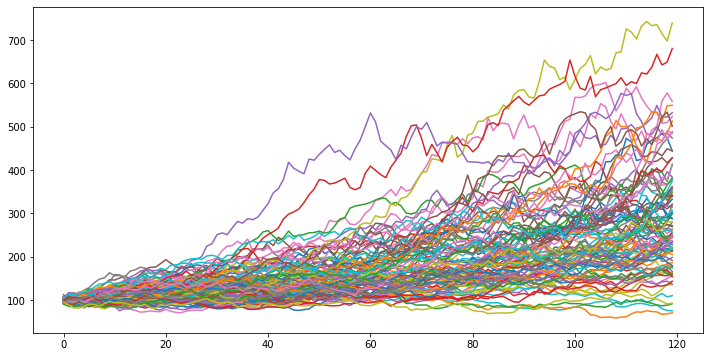

In [2]:
erk.gbm(10, 100, mu = 0.1).plot(legend = False, figsize = (12, 6))

In [3]:
def show_gbm(n_scenarios, mu, sigma):
    '''
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    '''
    s_0 = 100
    prices = erk.gbm_updated(n_scenarios = n_scenarios, mu = mu, sigma = sigma, s_0 = s_0)
    ax = prices.plot(legend = False, color = 'indianred', alpha = 0.5, linewidth = 2, figsize = (12, 5))
    ax.axhline(y = 100, ls = ':', color = 'black')
    ax.set_ylim(top = 400)
    # draw a dot at the origin
    ax.plot(0, s_0, marker = 'o', color = 'darkred', alpha = 0.2)

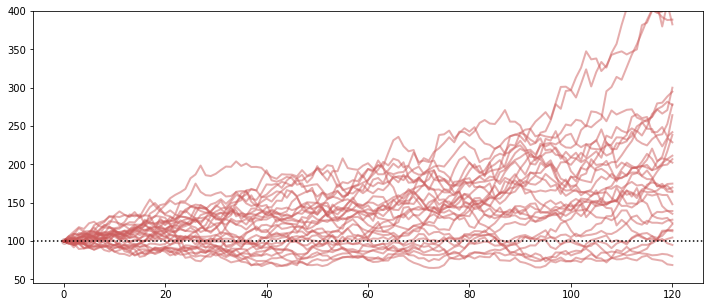

In [4]:
show_gbm(30, mu = 0.07, sigma = 0.15)

In [5]:
gbm_controls = widgets.interactive(show_gbm, n_scenarios = (1, 100, 1), mu = (-0.2, 0.2, 0.01), sigma = (0, 0.3, 0.01))

In [6]:
display(gbm_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1), FloatSlider(value=0.0, descriptio…

### Interactive CPPI Monte Carlo Simulation

In [7]:
def show_cppi(n_scenarios = 50, mu = 0.07, sigma = 0.15, m = 3, floor = 0, riskfree_rate = 0.03, y_max = 100):
    '''
    Plot the results of a Monte Carlo simulation of CPPI
    '''
    start = 100
    sim_rets = erk.gbm_updated(n_scenarios = n_scenarios, mu = mu, sigma = sigma, prices = False, steps_per_year = 12)
    risky_r = pd.DataFrame(sim_rets)
    # run the back-test
    btr = erk.run_cppi(risky_r = pd.DataFrame(risky_r), riskfree_rate = riskfree_rate, m = m, start = start, floor = floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max() * y_max/100
    ax = wealth.plot(legend = False, alpha = 0.3, color = 'indianred', figsize = (12, 8))
    ax.axhline(y = start, ls = ':', color = 'black')
    ax.axhline(y = start * floor, ls = '--', color = 'red')
    ax.set_ylim(top = y_max)

In [8]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50),
                                    mu = (0., +0.2, 0.01),
                                    sigma = (0., 0.30, 0.05),
                                    floor = (0, 2, 0.1),
                                    m = (1, 5, 0.5),
                                    riskfree_rate = (0, 0.5, 0.01),
                                    y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100, description = 'Zoom y-axis'))

In [9]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [10]:
def show_cppi(n_scenarios = 50, mu = 0.07, sigma = 0.15, m = 3, floor = 0, riskfree_rate = 0.03, y_max = 100):
    '''
    Plot the results of a Monte Carlo Simulation of CPPI
    '''
    start = 100
    sim_rets = erk.gbm_updated(n_scenarios = n_scenarios, mu = mu, sigma = sigma, prices = False, steps_per_year = 12)
    risky_r = pd.DataFrame(sim_rets)
    # run the back-test
    btr = erk.run_cppi(risky_r = pd.DataFrame(sim_rets), riskfree_rate = riskfree_rate, m = m, start = start, floor = floor)
    wealth = btr['Wealth']
    # calculate terminal wealth stats
    y_max = wealth.values.max() * y_max/100
    terminal_wealth = wealth.iloc[-1]
    # plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows = 1, ncols = 2, sharey = True, gridspec_kw = {'width_ratios':[3, 2]}, figsize = (24, 9))
    plt.subplots_adjust(wspace = 0.0)

    wealth.plot(ax = wealth_ax, legend = False, alpha = 0.3, color = 'indianred')
    wealth_ax.axhline(y = start, ls = ':', color = 'black')
    wealth_ax.axhline(y = start * floor, ls = '--', color = 'red')
    wealth_ax.set_ylim(top = y_max)

    terminal_wealth.plot.hist(ax = hist_ax, bins = 50, ec = 'w', fc = 'indianred', orientation = 'horizontal')
    hist_ax.axhline(y = start, ls = ':', color = 'black')

In [11]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50),
                                    mu = (0., +0.2, 0.01),
                                    sigma = (0., 0.30, 0.05),
                                    floor = (0, 2, 0.1),
                                    m = (1, 5, 0.5),
                                    riskfree_rate = (0, 0.5, 0.01),
                                    y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100, description = 'Zoom y-axis'))

In [12]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [45]:
from turtle import color


def show_cppi(n_scenarios = 50, mu = 0.07, sigma = 0.15, m = 3, floor = 0, riskfree_rate = 0.03, steps_per_year = 12, y_max = 100):
    '''
    Plot the results of a Monte Carlo Simulation of CPPI
    '''
    start = 100
    sim_rets = erk.gbm_updated(n_scenarios = n_scenarios, mu = mu, sigma = sigma, prices = False, steps_per_year = steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the back-test
    btr = erk.run_cppi(risky_r = pd.DataFrame(sim_rets), riskfree_rate = riskfree_rate, m = m, start = start, floor = floor)
    wealth = btr['Wealth']
    # calculate terminal wealth stats
    y_max = wealth.values.max() * y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failiure_mask = np.less(terminal_wealth, start * floor)
    n_failiures = failiure_mask.sum()
    p_fail = n_failiures/n_scenarios

    e_shortfall = np.dot(terminal_wealth - start * floor, failiure_mask)/n_failiures if n_failiures > 0 else 0.0

    # plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows = 1, ncols = 2, sharey = True, gridspec_kw = {'width_ratios':[3, 2]}, figsize = (24, 9))
    plt.subplots_adjust(wspace = 0.0)

    wealth.plot(ax = wealth_ax, legend = False, alpha = 0.3, color = 'indianred')
    wealth_ax.axhline(y = start, ls = ':', color = 'black')
    wealth_ax.axhline(y = start * floor, ls = '--', color = 'red')
    wealth_ax.set_ylim(top = y_max)

    terminal_wealth.plot.hist(ax = hist_ax, bins = 50, ec = 'w', fc = 'indianred', orientation = 'horizontal')
    hist_ax.axhline(y = start, ls = ':', color = 'black')
    hist_ax.axhline(y = tw_mean, ls = ':', color = 'blue')
    hist_ax.axhline(y = tw_median, ls = ':', color = 'purple')
    hist_ax.annotate(f'Mean: ${int(tw_mean)}', xy = (0.675, 0.9), xycoords = 'axes fraction', fontsize = 24)
    hist_ax.annotate(f'Median: ${int(tw_median)}', xy = (0.675, 0.85), xycoords = 'axes fraction', fontsize = 24)

    if (floor > 0.01):
        hist_ax.axhline(y = start * floor, ls = '--', color = 'red', linewidth = 3)
        hist_ax.annotate(f'Violations: {n_failiures} ({p_fail * 100: 2.2f}%)\n E(shortfall)=${e_shortfall: 2.2f}', xy = (0.675, 0.7),xycoords = 'axes fraction', fontsize = 24)

In [48]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50),
                                    mu = (0., +0.2, 0.01),
                                    sigma = (0., 0.5, 0.05),
                                    floor = (0, 2, 0.1),
                                    m = (1, 5, 0.5),
                                    riskfree_rate = (0, 0.5, 0.01),
                                    steps_per_year = widgets.IntSlider(min = 1, max = 12, step = 1, value = 12, description = 'Rebals/Year'),
                                    y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100, description = 'Zoom y-axis'))

In [49]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…